In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Root Finding

The point of this section is pretty straightforward.  I give you a function $f(x)$ and an interval, say $[a,b]$.  Now you tell me those points $c_{\ast}\in[a,b]$ such that 

$$
f(c_{\ast}) = 0.
$$

The first approach we are going to study is called the _ Bisection Method _.  It relies on there being a sign change over the interval $[a,b]$.  Said another way, for the Bisection Method to work we need

> **Criteria for Bisection Method**: For the Bisection method to work on an interval $[a,b]$, we need $f$ to be continuous on $[a,b]$, and we need $f(a)f(b)<0$.

The sign change ensures that there is some point $c \in (a,b)$ such that $f(c)=0$. Once we know the criteria is met, the method goes as follows.  

1.  Find the mid-point $c = \frac{b+a}{2}$. 
2.  Check $f(c)=0$.  If yes, you have a root.  
3.  If not, check $f(a)f(c)<0$.  If yes, you have a root in $(a,c)$.  If not, you have a root in $(c,b)$.
4.  Re-define your interval accordingly, repeat until... well what makes sense here?

![bsctmeth](https://upload.wikimedia.org/wikipedia/commons/8/8c/Bisection_method.svg)

In [8]:
def bisec_method(a,b,f,tol):
    fa,fb = f(a),f(b)
    if fa*fb<0:
        c = (a+b)/2.
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc)>=tol:
            if fa*fc<0:
                b = c                
            else:
                fa = fc
                a = c
                
            c = (a+b)/2.    
            fc = f(c)
            capproxs = np.append(capproxs,c)
            
        # print("Our root is: %1.15f" %c)
        return capproxs
    else:
        print("Cannot ensure existence of root.")

In [18]:
def rate_of_conv(capproxs):
    tterms = capproxs.size
    cstar = capproxs[tterms-1]
    cnp1 = np.log10(np.abs(capproxs[1:tterms-1]-cstar))
    cn = np.log10(np.abs(capproxs[0:tterms-2]-cstar))
    ftprms = np.polyfit(cn,cnp1,1)
    print("Intercept value: %1.15f" %10.**(ftprms[1]))
    print("Slope value: %1.15f" %ftprms[0])
    
    plt.scatter(cn,cnp1)
    plt.plot(cn,(ftprms[0]*cn+ftprms[1]))
    plt.xlabel("$\log_{10}|c_{n}-c_{*}|$")
    plt.ylabel("$\log_{10}|c_{n+1}-c_{*}|$")

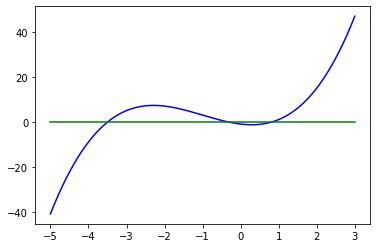

In [19]:
f = lambda x: x**3 + 3.*x**2 - 2.*x - 1.
xvals = np.linspace(-5.,3.,int(1e3))
yvals = f(xvals)
zvals = np.zeros(xvals.size)
plt.plot(xvals,yvals,color='b')
plt.plot(xvals,zvals,color='g')

Our root is: -3.490863615361036
Intercept value: 0.397342337378376
Slope value: 0.984532949378742


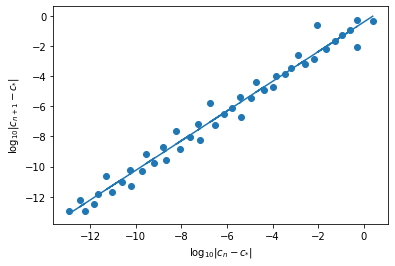

In [20]:
capproxs = bisec_method(-5.,3.,f,1e-13)
rate_of_conv(capproxs)

## Rate of Convergence

We now want a means of figuring out how fast the Bisection Method runs.  So, if you think about it, at every iteration of the method, an approximation, say $c_{n}$, to the root, say $c_{\ast}$, is generated.  For the method to converge, we mean that 

$$
\lim_{n\rightarrow \infty} c_{n} = c_{\ast},
$$

or equivalently

$$
\lim_{n\rightarrow \infty} \left|c_{n} - c_{\ast}\right|=0,
$$

But the question then becomes, how quickly does this limit go to zero?  

_Problem_: Can you do this for the Bisection Method?  In other words, is there a formula you can write down which tells you how quickly $|c_{n}-c_{\ast}|$ goes to zero?

In general, we think of answering this question by defining what is called the rate of convergence.

> **Rate of Convergence**: For an iterative sequence $c_{n}\rightarrow c_{\ast}$, we define the rate of convergence, $\alpha$, to be $$\lim_{n\rightarrow\infty}\frac{\left|c_{n+1}-c_{\ast}\right|}{\left|c_{n}-c_{\ast}\right|^{\alpha}} = \lambda $$.

The idea here is that for very large $n$, we have that 

$$
\left|c_{n+1}-c_{\ast}\right| \approx \lambda \left|c_{n}-c_{\ast}\right|^{\alpha}
$$

_Problem_: What would a logarithm tell you?  How would you use that to numerically compute the rate of convergence?  

_Problem_: Modify your code for the Bisection Method to find the rate of convergence.  Does it agree with your theoretical prediction?  

## Newton's Method

The idea here is to use the tangent line approximation of a function, say $f(x)$, to approximate a root.  By this we mean, at the point $(x,f(x))$, finding a root $x_{\ast}$ by solving 

$$
0 = f(x) + f'(x)(x_{\ast}-x),
$$
which upon solving for the root $x_{\ast}$, gives us 

$$
x_{\ast} = x - \frac{f(x)}{f'(x)}.
$$

However, we imagine this only works if $x$ is very close to $x_{ast}$.  However, if that is the case, then if we turn this in to an interative method via the formula,

$$
x_{n} = x_{n-1} - \frac{f(x_{n-1})}{f'(x_{n-1})}, ~ n\geq 1
$$

then by repeating this process again and again, we should get closer and closer to the actual root.  

![nwtmeth](https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif)
_ Problem _: You code this up!

In [10]:
#f = lambda x: x**3. + 3.*x**2. - 2.*x - 1
#fp = lambda x: 3.*x**2. + 6.*x - 2.

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) >= tol :
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    # print("Your root is: %1.15f" %x1)
    # rate_of_conv(xapprox)
    return xapprox

Your root is: -3.490863615361032
Intercept value: 0.658170888430388
Slope value: 2.026314546060974


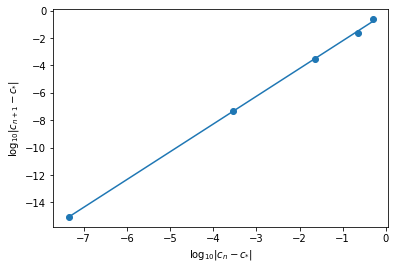

In [22]:
Newtons_method(f,fp,-3.,1e-8)

## The Secant Method

We note that Newton's method suffers from a couple of flaws.  First, it will not work if $f'(x_{\ast})=0$.  Further, if $\left|f'(x_{\ast})\right|\ll 1$, it will work very, very slowly.  Further, we also note that the method requires us to compute a derivative of what could be very complicated functions.  Thus, it turns out that by using an approximation to the derivative of the form

$$
f'(x_{n}) \approx \frac{f(x_{n})-f(x_{n-1})}{x_{n}-x_{n-1}},
$$

we can partially get around some of these problems.  This approach is called the _ Secant Method _.  See if you can code it up.  

In [11]:
def secant_method(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    xapprox = np.array([x0,x1,x2])
    while np.abs(x2-x1)>=tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
        xapprox = np.append(xapprox,x2)
    return xapprox

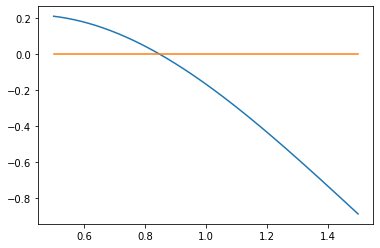

In [12]:
Pi = np.pi
xvals = np.linspace(.5,1.5,int(1e3)+1)
zvals = np.zeros(xvals.size)
f = lambda x: x*np.cos(x) - (np.sin(x))**2.
fp = lambda x: np.cos(x) - x*np.sin(x) - 2*np.sin(x)*np.cos(x)
plt.figure(1)
plt.plot(xvals,f(xvals))
plt.plot(xvals,zvals)

Text(0, 0.5, 'Iteration Count')

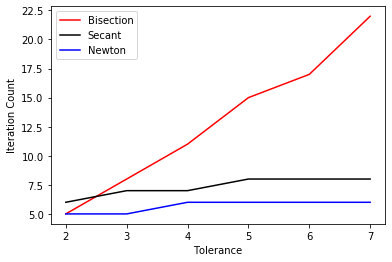

In [13]:
pows = np.arange(2,8)
tols = 10.**(-pows)
x0 = .6
x1 = 1.2
ind = 0
cntbsc = np.zeros(tols.size)
cntscnt = np.zeros(tols.size)
cntnwt = np.zeros(tols.size)
for tol in tols:
    cvlsbsc = bisec_method(x0,x1,f,tol)
    cvlsscnt = secant_method(f,x0,x1,tol)
    cvlsnwt = Newtons_method(f,fp,x0,tol)
    cntbsc[ind] = cvlsbsc.size
    cntscnt[ind] = cvlsscnt.size
    cntnwt[ind] = cvlsnwt.size
    ind += 1
    
plt.plot(pows,cntbsc,color='r',label="Bisection")
plt.plot(pows,cntscnt,color='k',label="Secant")
plt.plot(pows,cntnwt,color='b',label="Newton")
plt.legend(loc="best")
plt.xlabel("Tolerance")
plt.ylabel("Iteration Count")